In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/enerji/enerjicsv.csv
/kaggle/input/enerji1/data.csv


In [29]:
import pandas as pd

# Veriyi oku ve sütun isimlerini belirle
veri = pd.read_csv("/kaggle/input/enerji1/data.csv")

# Verinin ilk birkaç satırını göster
print(veri.head())


   PhotonDetCopyNoVec  PhotonDetTimeVec  PhotonDetOriginVec  \
0                  16              2.23                   0   
1                   1              3.25                   0   
2                  18              2.07                   1   
3                  14              2.78                   0   
4                  13              3.60                   0   

   PhotonDetEnergyVec  
0                3.46  
1                3.23  
2                3.37  
3                3.37  
4                3.19  


In [31]:
veri

,PhotonDetCopyNoVec,PhotonDetTimeVec,PhotonDetOriginVec,PhotonDetEnergyVec
0,16,2.23,0,3.46
1,1,3.25,0,3.23
2,18,2.07,1,3.37
3,14,2.78,0,3.37
4,13,3.60,0,3.19
...,...,...,...,...
73781,19,2.88,0,3.42
73782,14,2.19,1,3.27
73783,13,3.25,0,3.32
73784,10,2.34,0,3.45


In [33]:

# Girdi özelliklerini (X) ve çıktı etiketini (y) belirle
X = veri.drop("PhotonDetOriginVec", axis=1)  # Cherenkov sütununu çıkararak girdi özelliklerini belirle
y = veri["PhotonDetOriginVec"]  # Cherenkov sütununu çıktı etiketi olarak belirle

# Veriyi eğitim ve test kümelerine ayır
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# Veriyi eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest sınıflandırıcıyı oluştur
clf = RandomForestClassifier()

# Modeli eğit
clf.fit(X_train, y_train)

# Eğitim ve test kümeleri üzerinde tahmin yap
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Sonuçları değerlendir
print("Eğitim Verisi Sonuçları:")
print(classification_report(y_train, train_predictions))
print("Test Verisi Sonuçları:")
print(classification_report(y_test, test_predictions))

Eğitim Verisi Sonuçları:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45609
           1       1.00      1.00      1.00     13419

    accuracy                           1.00     59028
   macro avg       1.00      1.00      1.00     59028
weighted avg       1.00      1.00      1.00     59028

Test Verisi Sonuçları:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11311
           1       0.85      0.84      0.84      3447

    accuracy                           0.93     14758
   macro avg       0.90      0.90      0.90     14758
weighted avg       0.93      0.93      0.93     14758



In [38]:
from lightgbm import LGBMClassifier

# LGBM sınıflandırıcıyı oluştur
clf = LGBMClassifier()

# Modeli eğit
clf.fit(X_train, y_train)

# Eğitim ve test kümeleri üzerinde tahmin yap
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Sonuçları değerlendir
print("LGBM - Eğitim Verisi Sonuçları:")
print(classification_report(y_train, train_predictions))
print("LGBM - Test Verisi Sonuçları:")
print(classification_report(y_test, test_predictions))


[LightGBM] [Info] Number of positive: 13419, number of negative: 45609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 59028, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227333 -> initscore=-1.223433
[LightGBM] [Info] Start training from score -1.223433
LGBM - Eğitim Verisi Sonuçları:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     45609
           1       0.87      0.87      0.87     13419

    accuracy                           0.94     59028
   macro avg       0.91      0.92      0.92     59028
weighted avg       0.94      0.94      0.94     59028

LGBM - Test Verisi Sonuçları:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     11311
          

[LightGBM] [Info] Number of positive: 13419, number of negative: 45609
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 59028, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.227333 -> initscore=-1.223433
[LightGBM] [Info] Start training from score -1.223433


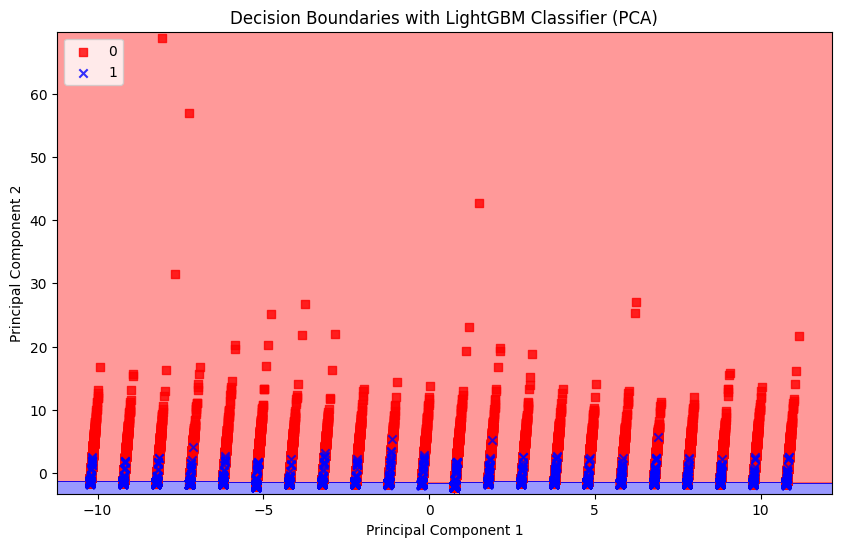

In [50]:
from sklearn.decomposition import PCA

# Veri setini iki boyuta indirge
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# LightGBM sınıflandırıcıyı oluştur ve eğit
clf_pca = LGBMClassifier()
clf_pca.fit(X_train_pca, y_train)

# Karar sınırlarını çiz
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_pca, y_train, classifier=clf_pca)
plt.title('Decision Boundaries with LightGBM Classifier (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left')
plt.show()


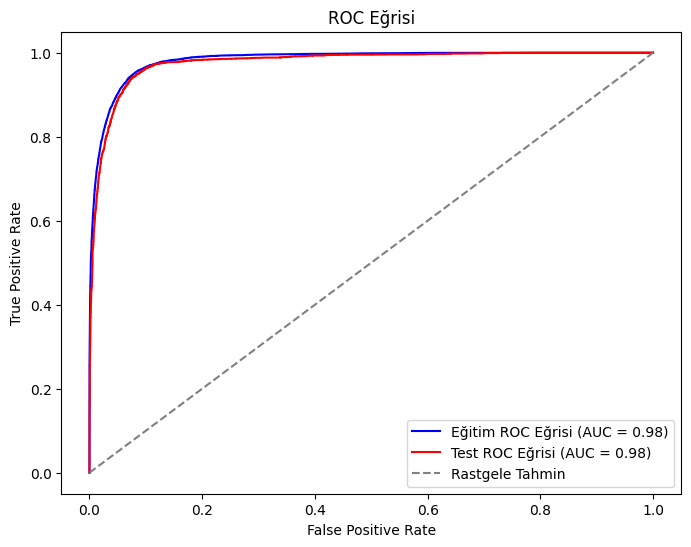

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Eğitim ve test kümeleri üzerinde tahmin yap
train_probs = clf.predict_proba(X_train)[:, 1]
test_probs = clf.predict_proba(X_test)[:, 1]

# ROC eğrilerini hesapla
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label='Eğitim ROC Eğrisi (AUC = %0.2f)' % auc(train_fpr, train_tpr))
plt.plot(test_fpr, test_tpr, color='red', label='Test ROC Eğrisi (AUC = %0.2f)' % auc(test_fpr, test_tpr))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Rastgele Tahmin')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()
